# Chapter 09 K-Nearest Neighbors (KNN) for Anomaly Detection

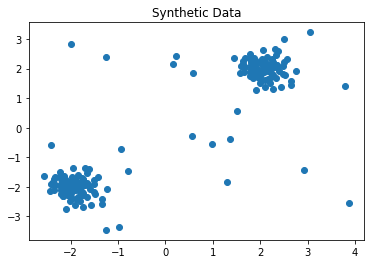

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(1)

# Generate training data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Combine the two datasets
X = np.r_[X_inliers, X_outliers]

# Plot the data
plt.scatter(X[:, 0], X[:, 1])

plt.title("Synthetic Data")
plt.show()

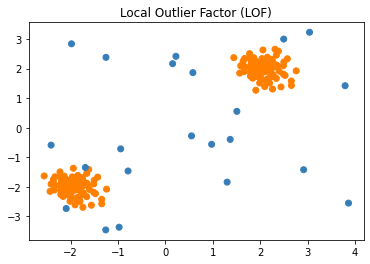

In [3]:
# Fit the model
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)

# Generate colors based on the prediction
colors = np.array(['#377eb8', '#ff7f00'])
plt.scatter(X[:, 0], X[:, 1], color=colors[(y_pred + 1) // 2])

plt.title("Local Outlier Factor (LOF)")
plt.show()

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Set the fraction of data to sample
fraction = 0.1

# We will use stratified sampling to maintain the ratio of anomalies
stratified_data = data.groupby('Class', group_keys=False).apply(lambda x: x.sample(frac=fraction))

# Separate out the features and labels
X_sample = stratified_data.drop('Class', axis=1)
y_sample = stratified_data['Class']

# Standardize the features to have a mean of ~0 and a variance of 1
scaler = StandardScaler()
X_std_sample = scaler.fit_transform(X_sample)

# Train the model
model = LocalOutlierFactor(n_neighbors=20, novelty=True)
model.fit(X_std_sample[y_sample == 0])  # train the model on the normal transactions

# Predict the labels for the entire dataset
y_pred_sample = model.predict(X_std_sample)

# Convert the prediction values to match with 'Class' column in the original dataset
y_pred_sample[y_pred_sample == 1] = 0
y_pred_sample[y_pred_sample == -1] = 1

# Print the confusion matrix
print(confusion_matrix(y_sample, y_pred_sample))

[[27070  1362]
 [    5    44]]


In [3]:
from sklearn.metrics import classification_report

print(classification_report(y_sample, y_pred_sample))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     28432
           1       0.03      0.90      0.06        49

    accuracy                           0.95     28481
   macro avg       0.52      0.93      0.52     28481
weighted avg       1.00      0.95      0.97     28481

